# Creating our Predictive model inside the Churn_LH Lakehouse

## Loading Dataset and Converting as Pandas Dataframe

In [2]:
# First we will import our delta table into spark and convert it to a pandas dataframe

df = spark.read.format('delta').load("abfss://Churn_WS@onelake.dfs.fabric.microsoft.com/Churn_LH.Lakehouse/Tables/Databel__Data") 
dataset = df.toPandas()
dataset.head(5)

StatementMeta(, e6be1ebe-9fcc-4541-aacd-385ede578155, 4, Finished, Available)

,Customer_ID,Churn_Label,Account_Length_Months,Local_Calls,Local_Mins,Intl_Calls,Intl_Mins,Intl_Active,Intl_Plan,Extra_International_Charges,...,Senior,Group,Number_of_Customers_in_Group,Device_Protection_&_Online_Backup,Contract_Type,Payment_Method,Monthly_Charge,Total_Charges,Churn_Category,Churn_Reason
0,4676-RXAH,No,70,187,422.5,1050,1022.0,Yes,yes,0,...,No,No,0,No,Two Year,Credit Card,24,1676,Unknown,Unknown
1,0476-UFII,No,32,64,126.1,256,265.6,Yes,yes,0,...,No,No,0,Yes,Two Year,Credit Card,30,960,Unknown,Unknown
2,6634-FVNB,No,35,144,424.4,70,329.0,Yes,yes,0,...,Yes,No,0,No,Month-to-Month,Credit Card,50,1758,Unknown,Unknown
3,0600-QGOV,No,53,354,845.5,212,445.2,Yes,yes,0,...,No,No,0,No,Two Year,Credit Card,27,1413,Unknown,Unknown
4,6289-MEER,No,31,103,251.0,186,483.6,Yes,yes,0,...,Yes,No,0,No,Two Year,Direct Debit,44,1388,Unknown,Unknown


In [3]:
# Check our data structure

dataset.describe()

StatementMeta(, e6be1ebe-9fcc-4541-aacd-385ede578155, 5, Finished, Available)

,Account_Length_Months,Local_Calls,Local_Mins,Intl_Calls,Intl_Mins,Extra_International_Charges,Customer_Service_Calls,Avg_Monthly_GB_Download,Extra_Data_Charges,Age,Number_of_Customers_in_Group,Monthly_Charge,Total_Charges
count,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000,6687.000000
mean,32.337820,130.974129,322.752864,51.097802,130.070624,33.642889,0.915657,6.696276,3.374458,47.448632,0.837894,31.030357,1083.755645
std,24.595689,121.893966,288.619931,103.592440,243.527828,76.348332,1.411484,7.454339,12.565309,16.969893,1.700780,16.288147,1127.074863
min,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,5.000000,6.000000
25%,9.000000,31.000000,76.900000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,33.000000,0.000000,16.000000,181.000000
50%,29.000000,98.000000,250.500000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,47.000000,0.000000,31.000000,647.000000
75%,55.000000,199.000000,498.050000,52.000000,140.400000,16.000000,2.000000,9.000000,0.000000,60.000000,0.000000,43.000000,1732.500000
max,77.000000,918.000000,1234.200000,1120.000000,1372.500000,586.000000,5.000000,43.000000,99.000000,85.000000,6.000000,78.000000,5574.000000


In [4]:
dataset.shape

StatementMeta(, e6be1ebe-9fcc-4541-aacd-385ede578155, 6, Finished, Available)

(6687, 29)

In [5]:
dataset.columns

StatementMeta(, e6be1ebe-9fcc-4541-aacd-385ede578155, 7, Finished, Available)

Index(['Customer_ID', 'Churn_Label', 'Account_Length_Months', 'Local_Calls',
       'Local_Mins', 'Intl_Calls', 'Intl_Mins', 'Intl_Active', 'Intl_Plan',
       'Extra_International_Charges', 'Customer_Service_Calls',
       'Avg_Monthly_GB_Download', 'Unlimited_Data_Plan', 'Extra_Data_Charges',
       'State', 'Phone_Number', 'Gender', 'Age', 'Under_30', 'Senior', 'Group',
       'Number_of_Customers_in_Group', 'Device_Protection_&_Online_Backup',
       'Contract_Type', 'Payment_Method', 'Monthly_Charge', 'Total_Charges',
       'Churn_Category', 'Churn_Reason'],
      dtype='object')

## Predictive Modeling with Logistic Regression

In [6]:
# Importing necessary libraries
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import LabelEncoder, StandardScaler

StatementMeta(, e6be1ebe-9fcc-4541-aacd-385ede578155, 8, Finished, Available)

In [7]:
# Initializing the LabelEncoder
le = LabelEncoder()

# Transforming categorical variables into numerical ones
dataset['Churn_Label'] = le.fit_transform(dataset['Churn_Label'])
dataset['Unlimited_Data_Plan'] = le.fit_transform(dataset['Unlimited_Data_Plan'])
dataset['Gender'] = le.fit_transform(dataset['Gender'])
dataset['Contract_Type'] = le.fit_transform(dataset['Contract_Type'])


StatementMeta(, e6be1ebe-9fcc-4541-aacd-385ede578155, 9, Finished, Available)

In [8]:
# Defining the target variable
y = dataset['Churn_Label']

# Defining the feature variables
features = ['Account_Length_Months','Unlimited_Data_Plan','Gender', 'Age','Contract_Type','Monthly_Charge','Total_Charges']
X = dataset[features]

# Standardizing the feature variables
s = StandardScaler()
X = s.fit_transform(X)

StatementMeta(, e6be1ebe-9fcc-4541-aacd-385ede578155, 10, Finished, Available)

In [9]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Initializing the Logistic Regression model
log = LogisticRegression()

# Training the model
log.fit(X_train, y_train)

# Making predictions on the entire dataset
y_pred = log.predict(X)
y_prob = log.predict_proba(X)[:,1]

# Adding the predictions and probabilities to the original dataset
dataset['predictions'] = y_pred
dataset['probability'] = y_prob

StatementMeta(, e6be1ebe-9fcc-4541-aacd-385ede578155, 11, Finished, Available)

2024-03-21:17:52:21,125 WARNING  [tracking_store.py:153] log_inputs not supported
2024-03-21:17:52:21,151 WARNING  [tracking_store.py:153] log_inputs not supported


In [10]:
dataset.head()

StatementMeta(, e6be1ebe-9fcc-4541-aacd-385ede578155, 12, Finished, Available)

,Customer_ID,Churn_Label,Account_Length_Months,Local_Calls,Local_Mins,Intl_Calls,Intl_Mins,Intl_Active,Intl_Plan,Extra_International_Charges,...,Number_of_Customers_in_Group,Device_Protection_&_Online_Backup,Contract_Type,Payment_Method,Monthly_Charge,Total_Charges,Churn_Category,Churn_Reason,predictions,probability
0,4676-RXAH,0,70,187,422.5,1050,1022.0,Yes,yes,0,...,0,No,2,Credit Card,24,1676,Unknown,Unknown,0,0.006619
1,0476-UFII,0,32,64,126.1,256,265.6,Yes,yes,0,...,0,Yes,2,Credit Card,30,960,Unknown,Unknown,0,0.028503
2,6634-FVNB,0,35,144,424.4,70,329.0,Yes,yes,0,...,0,No,0,Credit Card,50,1758,Unknown,Unknown,1,0.579940
3,0600-QGOV,0,53,354,845.5,212,445.2,Yes,yes,0,...,0,No,2,Credit Card,27,1413,Unknown,Unknown,0,0.014020
4,6289-MEER,0,31,103,251.0,186,483.6,Yes,yes,0,...,0,No,2,Direct Debit,44,1388,Unknown,Unknown,0,0.078076


In [14]:
# Convert predictions into Yes and No
dataset['predictions'] = dataset['predictions'].replace({0: 'No', 1: 'Yes'})

# Define the bin edges
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]

# Define the labels for the bins
labels = [0.0, 0.2, 0.4, 0.6, 0.8]

# Create the bins using pandas cut function
dataset['Churn_Probability'] = pd.cut(dataset['probability'], bins=bins, labels=labels)

#Save predictions and probabilty as a new delta table to the model
Predicted_Data = dataset[['Customer_ID', 'predictions', 'probability', 'Churn_Probability']]
Predicted_Data.head()

StatementMeta(, e6be1ebe-9fcc-4541-aacd-385ede578155, 16, Finished, Available)

,Customer_ID,predictions,probability,Churn_Probability
0,4676-RXAH,No,0.006619,0.0
1,0476-UFII,No,0.028503,0.0
2,6634-FVNB,Yes,0.579940,0.4
3,0600-QGOV,No,0.014020,0.0
4,6289-MEER,No,0.078076,0.0


In [15]:
# convert and save our new table as a Delta Table
Predicted_Data = spark.createDataFrame(Predicted_Data)
Predicted_Data.write.mode("append").format("delta").saveAsTable("Predicted_Data")

StatementMeta(, e6be1ebe-9fcc-4541-aacd-385ede578155, 17, Finished, Available)

Now we can see our new table in our Churn_LH Lakehouse.

![Churn21.png](images/Churn21.png)

## Creating and Saving Our Sematic Model

Now we will Create a new semantic model named Chur_Data. In this model we are going to have two tables, Databel__Data and Predicted_Data. These tables are going to have a one to one relationship on Customer_ID column.

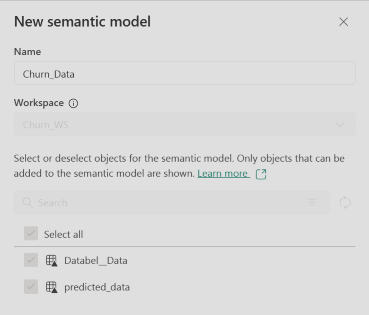

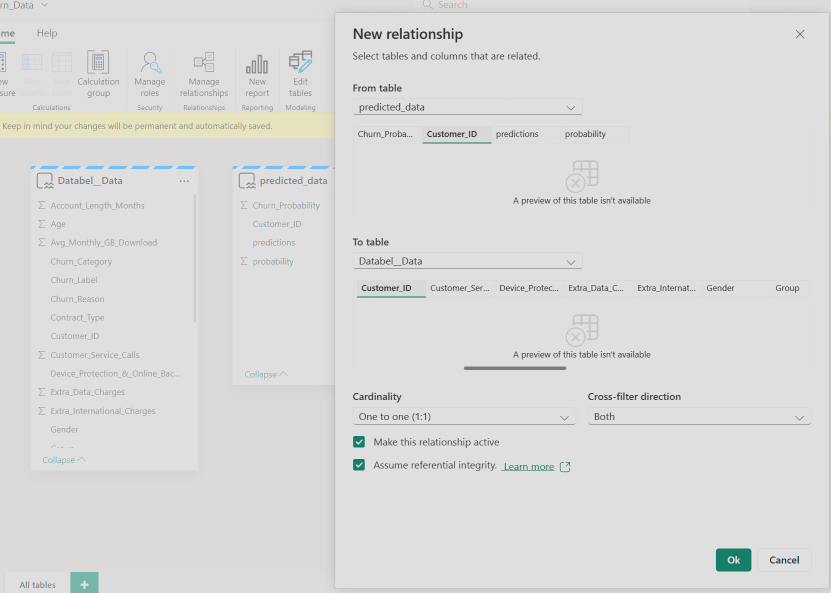

Now we have following items in our Churn_WS Workspace:

![Churn22.png](images/Churn22.png)